In [1]:
import rlssm
import pandas as pd
import os

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)


data = data[data.participant < 5].reset_index(drop=True)

data['block_label'] += 1

data

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0
1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0
2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0
3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0
4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0
...,...,...,...,...,...,...,...,...,...,...
953,4,3.0,75.0,51.0,44.0,3,1,37.0,1.396425,1.0
954,4,3.0,76.0,57.0,33.0,3,1,38.0,1.208049,1.0
955,4,3.0,77.0,42.0,30.0,3,1,39.0,1.276406,1.0
956,4,3.0,78.0,41.0,42.0,2,1,38.5,1.530143,0.0


In [3]:
model = rlssm.RLALBAModel_2A(2,
                           separate_learning_rates=True)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ce8f71c7f8e8ecc9e5cfc25fcfe29b81 NOW.


In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLALBA_2A', 'hierRLALBA_2A_2lr', 2)

### Fit

In [5]:
# sampling parameters
n_iter = 700
n_chains = 2
n_thin = 5

# learning parameters
K = 4 # n options
initial_value_learning = 17.5 # intitial value (Q0)


In [6]:
model_fit = model.fit(data,
                    K,
                    initial_value_learning,
                    thin = n_thin,
                    iter = n_iter,
                    chains = n_chains,
                    print_diagnostics = False)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


#### Get Rhat

In [7]:
model_fit.rhat.describe()

,rhat
count,48.000000
mean,115.182151
std,97.338975
min,10.210547
25%,41.907860
50%,91.392335
75%,160.936691
max,444.399267


In [8]:
model_fit.rhat.head()

,rhat,variable
0,51.223721,mu_k
1,196.165013,mu_A
2,64.065411,mu_tau
3,444.399267,mu_v0
4,29.971135,mu_ws


#### Calculate wAIC

In [9]:
model_fit.waic

{'lppd': -11142.278069498156,
 'p_waic': 57849.47291953988,
 'waic': 137983.50197807606,
 'waic_se': 3071.9447652163726}

#### Check divergences

#### Get posteriors

In [10]:
model_fit.samples

,chain,draw,transf_mu_k,transf_mu_A,transf_mu_tau,transf_mu_v0,transf_mu_ws,transf_mu_wd,transf_mu_alpha_pos,transf_mu_alpha_neg,...,wd_sbj[3],wd_sbj[4],alpha_pos_sbj[1],alpha_pos_sbj[2],alpha_pos_sbj[3],alpha_pos_sbj[4],alpha_neg_sbj[1],alpha_neg_sbj[2],alpha_neg_sbj[3],alpha_neg_sbj[4]
0,0,48,0.217536,2.101332,0.765928,1.468525,0.382037,0.186982,0.021836,0.388562,...,0.217188,0.239975,0.116446,0.079561,0.003558,0.037586,0.509103,0.806137,0.731168,0.547213
1,0,50,0.217946,2.100752,0.765834,1.467941,0.382153,0.186729,0.021753,0.388168,...,0.216930,0.239762,0.116295,0.079460,0.003533,0.037429,0.508337,0.806308,0.731729,0.547246
2,0,67,0.218653,2.101299,0.764045,1.469368,0.381218,0.185912,0.021729,0.388179,...,0.216068,0.238885,0.116054,0.079352,0.003531,0.037419,0.508823,0.806309,0.730047,0.546118
3,0,43,0.217558,2.101478,0.768285,1.467687,0.382477,0.187023,0.021899,0.388212,...,0.217215,0.240035,0.117165,0.079868,0.003567,0.037730,0.508176,0.806195,0.730837,0.546904
4,0,17,0.217172,2.100470,0.773882,1.470296,0.384316,0.188334,0.022091,0.387985,...,0.218873,0.241788,0.118002,0.080407,0.003584,0.038118,0.508218,0.807434,0.730703,0.546451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1,69,0.481371,0.774684,1.409268,0.268458,0.544946,0.484534,0.588545,0.044157,...,0.865536,0.884575,0.627890,0.543164,0.604135,0.654787,0.021330,0.057608,0.084375,0.088108
136,1,41,0.479030,0.768026,1.430501,0.271614,0.544134,0.487387,0.574356,0.044066,...,0.866004,0.894507,0.610175,0.526735,0.590988,0.641307,0.021049,0.058513,0.086544,0.090117
137,1,4,0.460944,0.772124,1.412920,0.268940,0.542210,0.490969,0.551850,0.044593,...,0.864720,0.898097,0.590764,0.502254,0.566826,0.618268,0.022892,0.059204,0.083035,0.086061
138,1,9,0.467047,0.768596,1.413539,0.268031,0.543669,0.494134,0.552905,0.045643,...,0.873309,0.908997,0.591415,0.503771,0.567576,0.619858,0.023113,0.060709,0.085212,0.088503


In [11]:
model_fit.trial_samples

OrderedDict([('k_t',
              array([[1.51631122, 1.51631122, 1.51631122, ..., 1.32807325, 1.32807325,
                      1.32807325],
                     [1.5236482 , 1.5236482 , 1.5236482 , ..., 1.33560165, 1.33560165,
                      1.33560165],
                     [1.53603346, 1.53603346, 1.53603346, ..., 1.34604989, 1.34604989,
                      1.34604989],
                     ...,
                     [1.91722008, 1.91722008, 1.91722008, ..., 4.18646786, 4.18646786,
                      4.18646786],
                     [1.8670812 , 1.8670812 , 1.8670812 , ..., 4.12869949, 4.12869949,
                      4.12869949],
                     [1.99606028, 1.99606028, 1.99606028, ..., 4.38455061, 4.38455061,
                      4.38455061]])),
             ('A_t',
              array([[3.51590096, 3.51590096, 3.51590096, ..., 0.82377916, 0.82377916,
                      0.82377916],
                     [3.51459896, 3.51459896, 3.51459896, ..., 0.82449383, 

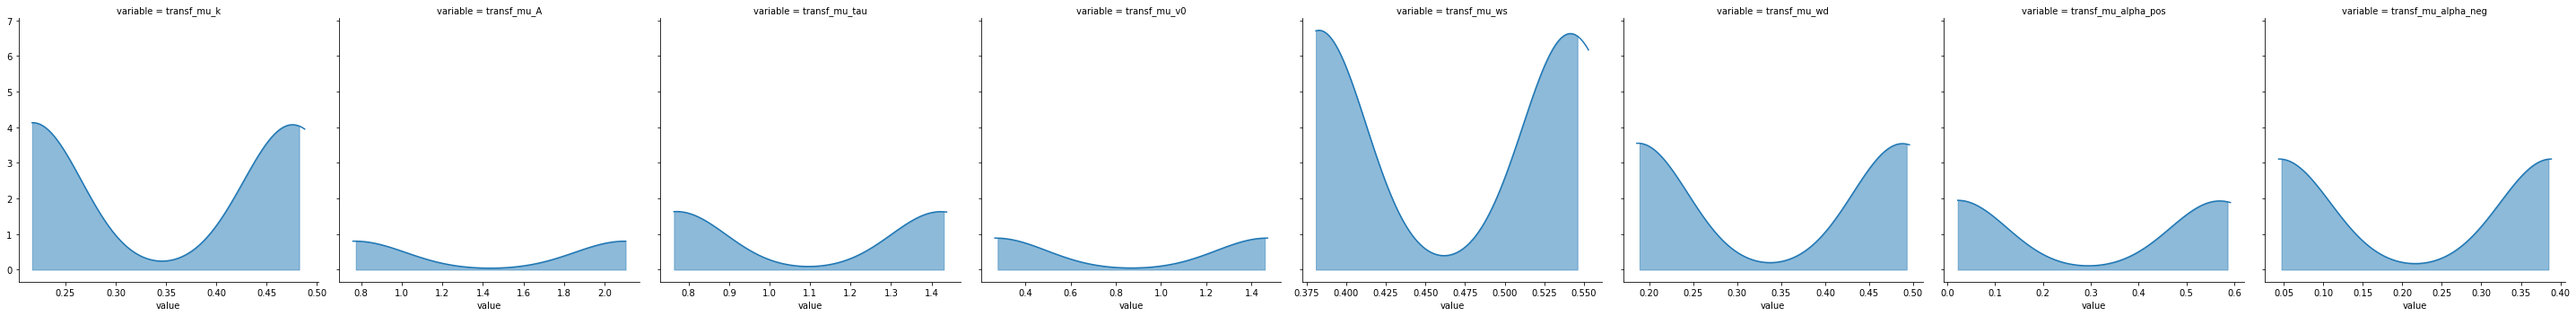

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

### Posterior predictives

In [13]:
import numpy as np
import seaborn as sns

In [14]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [15]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0,2,AB,1
1,1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0,1,CD,1
2,2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0,2,BD,1
3,3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0,2,CD,1
4,4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0,1,CD,1


#### Ungrouped posterior predictives:

In [16]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)

pp.head()

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         0.794395  1.625882  1.205966  1.328296  1.767459  0.957269   
2         1.562922  0.890708  1.009029  0.736590  1.580536  0.748091   
3         0.635283  1.656078  1.042371  1.097449  1.006164  0.893031   
4         1.171252  0.720139  0.887419  1.048762  1.525210  0.756710   
5         1.242192  2.100110  0.804646  2.040574  1.034860  0.962563   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      949  950  951  952   
sample                                            ...                           
1         0.607540  2.216015  0.703586  0.526114  ...      1.0  1.0  1.0  1.0   
2         0.983010  0.549648  0.484222  1.486070  ...      1.0  1.0  1.0  1.0   
3         1.150259  0.899893  0.598111  0.572809  ...      1.0  1.0  1.0  1.0   
4         0.697516  1.251113  0.571763  0.915391  ...      1.0  1.0  1.0  1.0   
5         1.858475  0.990839  1.214096  0.606030  ...      1.0  1.0  1.0  1.0   

variable                                
trial     953  954  955  956  957  958  
sample                                  
1         1.0  1.0  1.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  1.0  1.0  
3         1.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  1.0  1.0  1.0  1.0  1.0  

[5 rows x 1916 columns]

#### Grouped posterior predictives:

In [17]:
pp_grouped = model_fit.get_grouped_posterior_predictives_summary(grouping_vars=['choice_pair', 'block_bins'], 
                                                                 n_posterior_predictives=100)

In [18]:
pp_grouped.head()

mean_accuracy   mean_rt  skewness  \
choice_pair block_bins sample                                      
AB          1          1            0.724138  1.544961  0.672101   
                       2            0.655172  1.523814  0.797589   
                       3            0.620690  1.506971  0.688315   
                       4            0.551724  1.532994  0.897876   
                       5            0.586207  1.613024  0.808738   

                               quant_10_rt_incorrect  quant_10_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.136826             1.144994   
                       2                    1.171685             1.063546   
                       3                    1.292510             0.760827   
                       4                    0.905428             1.129190   
                       5                    1.171493             1.187995   

                               quant_30_rt_incorrect  quant_30_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    1.553643             1.226411   
                       2                    1.247593             1.143075   
                       3                    1.323131             1.130016   
                       4                    1.237646             1.239046   
                       5                    1.227715             1.305676   

                               quant_50_rt_incorrect  quant_50_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    2.023943             1.326775   
                       2                    1.312623             1.316189   
                       3                    1.346646             1.231271   
                       4                    1.299485             1.359097   
                       5                    1.304647             1.463774   

                               quant_70_rt_incorrect  quant_70_rt_correct  \
choice_pair block_bins sample                                               
AB          1          1                    2.469264             1.386166   
                       2                    1.372205             1.602313   
                       3                    1.459553             1.485831   
                       4                    1.517830             1.402453   
                       5                    1.402533             2.497160   

                               quant_90_rt_incorrect  quant_90_rt_correct  
choice_pair block_bins sample                                              
AB          1          1                    2.473546             2.467744  
                       2                    2.469955             2.475410  
                       3                    2.460880             2.453121  
                       4                    2.478700             2.474984  
                       5                    1.455198             2.502388

#### Plot grouped posterior predictives:

/Users/Khamir/DecisionMaking/_Reports/_7/rlssm/rlssm/fits_race.py:242: UserWarning: Cannot have more posterior predictive samples than posterior samples. Will continue with n_posterior_predictives=140
  pp_rt, pp_acc = self.get_posterior_predictives(n_posterior_predictives, **kwargs)


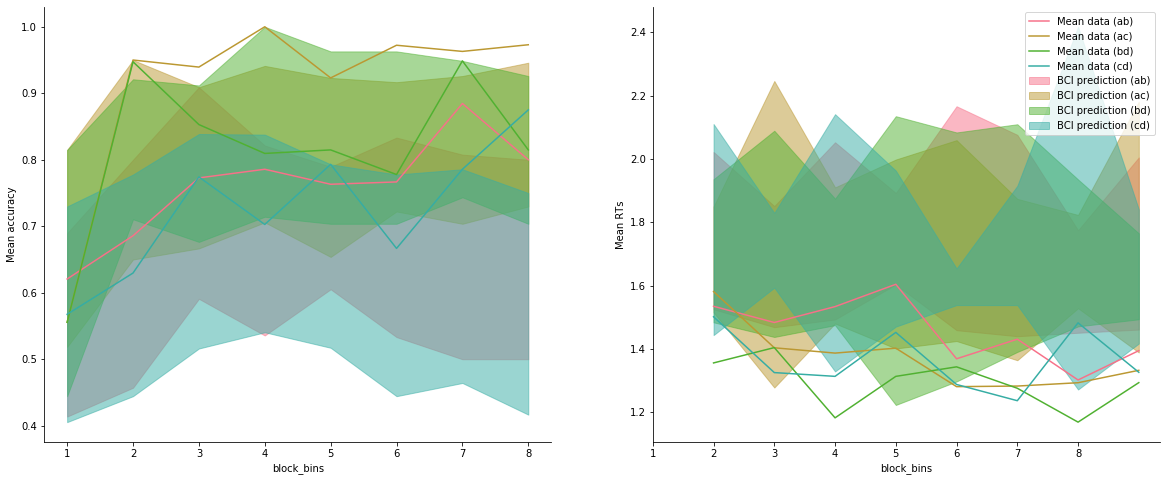

In [19]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins', 'choice_pair'],
    n_posterior_predictives=300,
    figsize=(20,8),
    hue_labels=['ab', 'ac', 'bd', 'cd'],
    hue_order=['AB', 'AC', 'BD', 'CD'],
    palette= sns.color_palette('husl'));

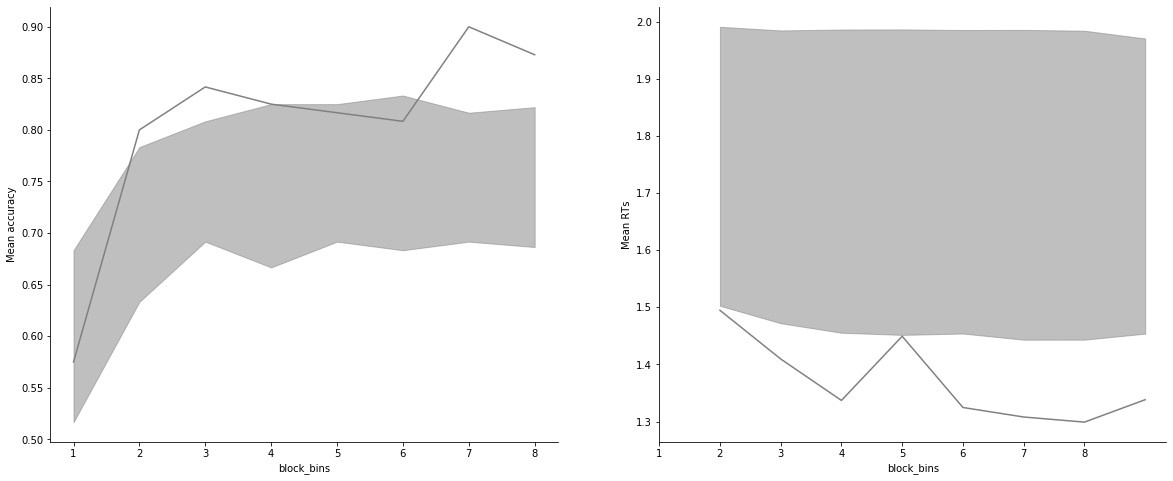

In [20]:
model_fit.plot_mean_grouped_posterior_predictives(
    grouping_vars=['block_bins'],
    n_posterior_predictives=300,
    figsize=(20,8));

### Get starting values for further sampling

In [21]:
sv = model_fit.last_values
sv

,chain,draw,warmup,mu_A,mu_alpha_neg,mu_alpha_pos,mu_k,mu_tau,mu_v0,mu_wd,...,z_v0[3],z_v0[4],z_wd[1],z_wd[2],z_wd[3],z_wd[4],z_ws[1],z_ws[2],z_ws[3],z_ws[4]
69,0,69,0,1.970199,-0.283976,-2.019572,-1.408372,0.137063,1.207051,-1.588902,...,0.376481,1.905876,-1.487621,0.729174,1.105609,1.855295,-1.095475,-0.888899,1.476514,-0.727496
139,1,69,0,0.156923,-1.704358,0.223805,-0.480795,1.129129,-1.177829,-0.472537,...,-1.256968,0.682142,0.901413,-2.004376,1.312314,1.366418,0.022060,-0.805360,0.391267,1.969299
